Can you count something interesting? 
- which months were the most or the least available (can make bar graph & scatter plot)
- which neighborhoods were the most popular
- which of those neighborhoods recieved a higher overall rating by 

Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

Can you make a bar plot or a histogram?

Can you compare two related quantities?

Can you make a scatterplot?

Can you make a time-series plot?

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [101]:
seattle = pd.read_csv("/Users/karinahou/Desktop/Data Science Bootcamp/Seattle DF Cleaned.csv")
calendar = pd.read_csv("/Users/karinahou/Desktop/Data Science Bootcamp/Calendar Cleaned.csv")

In [102]:
#looking for most popular neighborhoods
sorted_neigh = seattle["neighbourhood"].sort_values()
sorted_neigh.head()

431     Adams
5097    Adams
3084    Adams
688     Adams
1595    Adams
Name: neighbourhood, dtype: object

In [103]:
neigh_counted = sorted_neigh.value_counts()

neigh_counted = neigh_counted.rename_axis("neighbourhoods").reset_index(name= "count")
neigh_counted_top10 = neigh_counted.head(10)

Most popular neighborhood year-round was downtown exclusing "other"

Text(0.5, 1.0, '10 Most Popular Neighborhoods by Bookings')

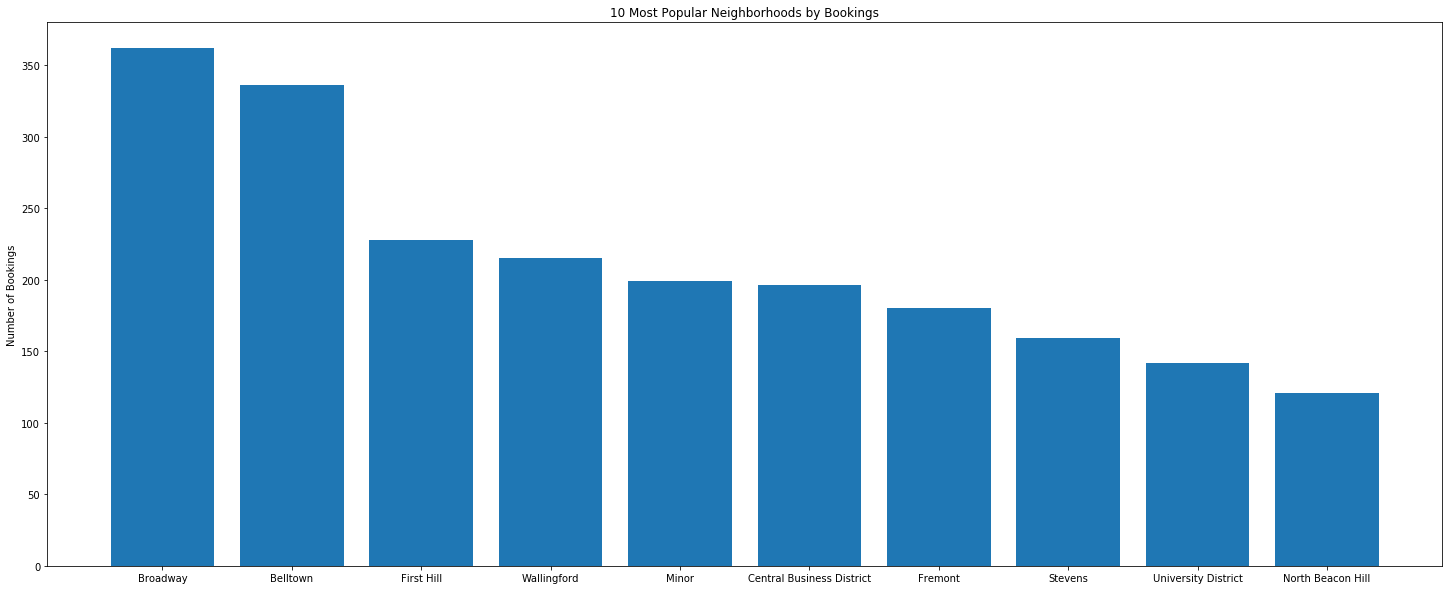

In [104]:
x = list(neigh_counted_top10["neighbourhoods"])
y = list(neigh_counted_top10["count"])
plt.figure(figsize=(25, 10)) 
plt.bar(x,y)
plt.ylabel("Number of Bookings")
plt.title("10 Most Popular Neighborhoods by Bookings")


In [105]:
#looking for most popular month of the year

In [106]:
calendar_unavail = calendar[calendar["available"] == "f"].index
calendar_avail = calendar.drop(calendar_unavail)
calendar_avail.head()

,Unnamed: 0,listing_id,date,available,price,month
0,0,241032,2016-01-04,t,$85.00,January
1,1,241032,2016-01-05,t,$85.00,January
9,9,241032,2016-01-13,t,$85.00,January
10,10,241032,2016-01-14,t,$85.00,January
14,14,241032,2016-01-18,t,$85.00,January


In [107]:
sorted_month_col = calendar_avail["month"].sort_values()
sorted_month_col.head()

919160     April
1237078    April
814768     April
814769     April
814770     April
Name: month, dtype: object

In [108]:
month_counted = sorted_month_col.value_counts()

month_counted = month_counted.rename_axis("month").reset_index(name= "count")
month_counted

,month,count
0,December,87061
1,March,83938
2,October,82438
3,November,81780
4,May,79971
5,September,77246
6,June,77244
7,August,76347
8,April,76037
9,July,74222


Text(0, 0.5, 'Number of Bookings')

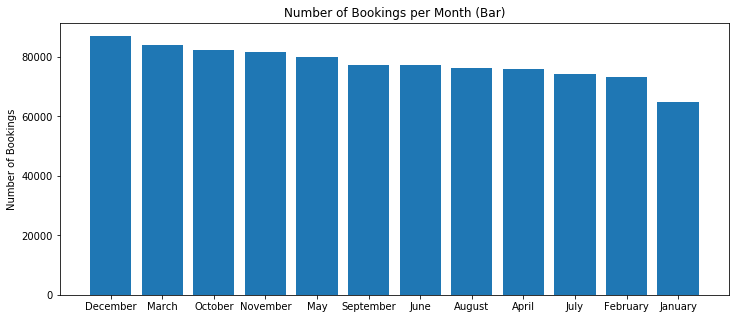

In [109]:
x = list(month_counted["month"])
y = list(month_counted["count"])
plt.figure(figsize=(12, 5)) 
plt.bar(x,y)
plt.title("Number of Bookings per Month (Bar)")
plt.ylabel("Number of Bookings")

#could divide

In [110]:
#linechart with labels of values

#boxplot: day of the month number of bookings, distribution of box plot

#to plot the differences between the month # of bookings

Most popular month was December

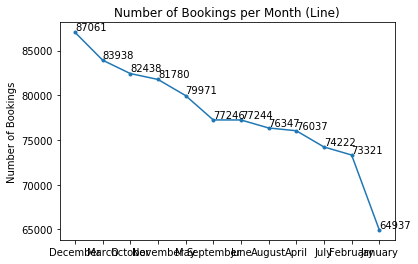

In [111]:
#plot as line chart

plt.plot(x,y, marker = ".")
plt.ylabel("Number of Bookings")
plt.title("Number of Bookings per Month (Line)")

for a,b in zip(x,y):

    label = "{:.0f}".format(b)

    plt.annotate(label, # this is the text
                 (a,b), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center

Text(0.5, 0, 'Bookings')

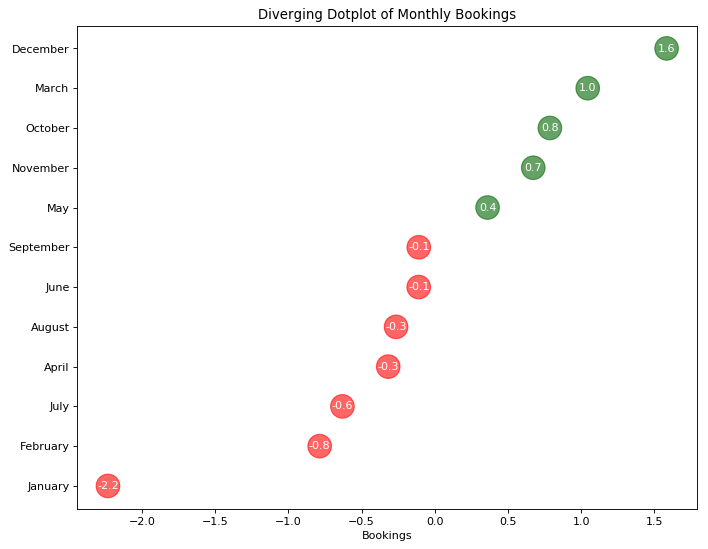

In [112]:
#Making a Divering Dot Plot that contrasts the number of bookings per month

month_x = month_counted.loc[:, ["count"]]
month_counted["mpg_z"] = (month_x - month_x.mean())/month_x.std()
month_counted["color"] = ["red" if month_x < 0 else "darkgreen" for month_x in month_counted["mpg_z"]]
month_counted.sort_values("mpg_z", inplace = True)
month_counted.reset_index(inplace = True)

plt.figure(figsize = (10,8), dpi = 80)
plt.scatter(month_counted.mpg_z, month_counted.index, s = 450, alpha = 0.6, color = month_counted.color)

for xm, ym, tex in zip(month_counted.mpg_z, month_counted.index, month_counted.mpg_z):
    t = plt.text(xm, ym, round(tex, 1), horizontalalignment = "center", verticalalignment = "center",
                fontdict = {"color":"white"})

plt.title("Diverging Dotplot of Monthly Bookings")
plt.yticks(month_counted.index, month_counted.month)

plt.xlabel("Bookings")

In [113]:
#which neighborhoods had the highest ratings?

In [114]:
satis_zero = seattle[seattle["overall_satisfaction"] == 0.0].index
seattle_no_zero_satis = seattle.drop(satis_zero)
neighborhood_reviews = seattle_no_zero_satis.filter(['overall_satisfaction','neighbourhood'], axis=1)
neighborhood_reviews.head()

,overall_satisfaction,neighbourhood
0,5.0,Madrona
1,5.0,South Delridge
2,4.5,Wallingford
3,4.5,Georgetown
4,5.0,First Hill


In [115]:
neigh_satisfaction = neighborhood_reviews.groupby("neighbourhood").median().reset_index()
top_neighborhoods = neigh_satisfaction.sort_values("overall_satisfaction", ascending = False).head(10)
top_neighborhoods

,neighbourhood,overall_satisfaction
0,Adams,5.0
54,North Delridge,5.0
64,Ravenna,5.0
63,Rainier View,5.0
62,Rainier Beach,5.0
61,Portage Bay,5.0
58,Pike-Market,5.0
57,Phinney Ridge,5.0
56,Olympic Hills,5.0
55,North Queen Anne,5.0


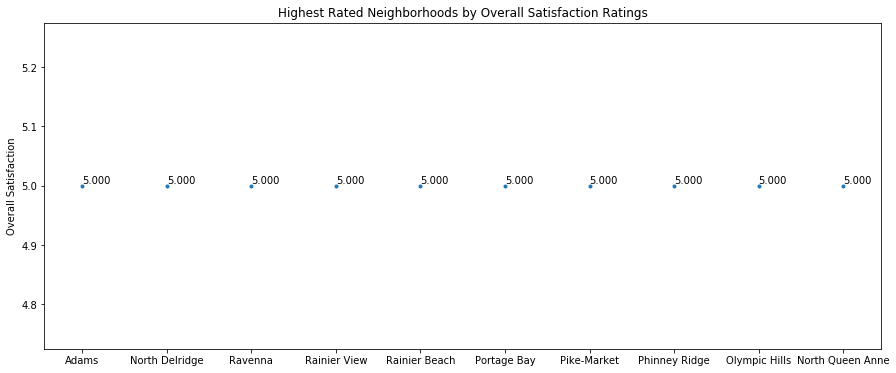

In [116]:
xn = list(top_neighborhoods["neighbourhood"])
yn = list(top_neighborhoods["overall_satisfaction"])
plt.figure(figsize=(15, 6)) 
plt.plot(xn,yn, marker = "." , linestyle = "None")
plt.title("Highest Rated Neighborhoods by Overall Satisfaction Ratings")
plt.ylabel("Overall Satisfaction")


for a,b in zip(xn,yn):

    label = "{:.3f}".format(b)

    plt.annotate(label, # this is the text
                 (a,b), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
    
#not useful to do a bar graph like this, maybe a line graph or


#maybe not the lines, or a horizontal bar plot, or just don't connect the dots
#use maybe median instead of mean - try a different one maybe? maybe also try the median of all the neighborhoods instead of the little ones
#median ended up making the top ~50 5.0 (is mean better?)

In [117]:
#thinking could make a plot with points of varying size to show and how many ratings they got too?
#could try bubble plot with month - satisfaction score & month or year & how many
#could use color as another axis (satisfaction score) - blue to red?


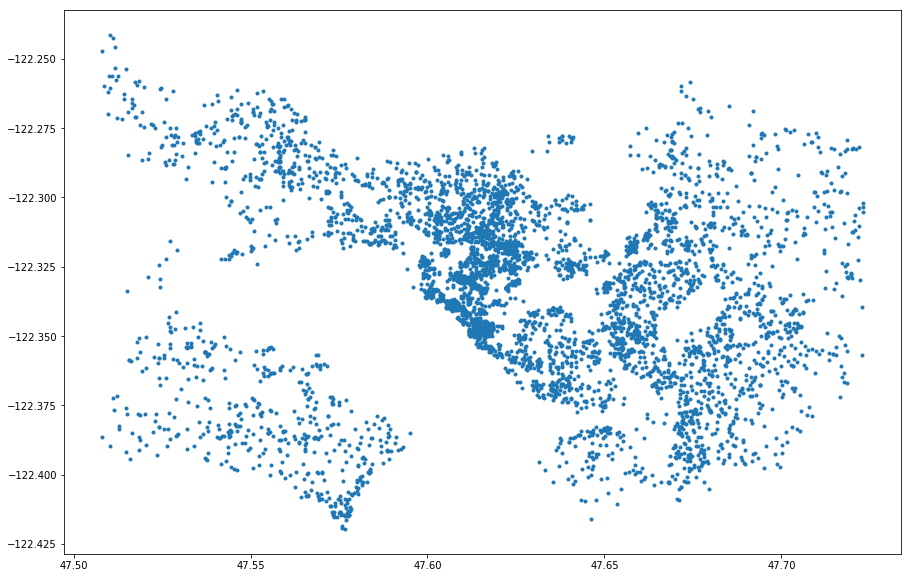

In [118]:
#visualizing the location
xlat = seattle["latitude"]
ylong = seattle["longitude"]
plt.figure(figsize=(15, 10))
plt.plot(xlat, ylong, linestyle = "none", marker = ".")

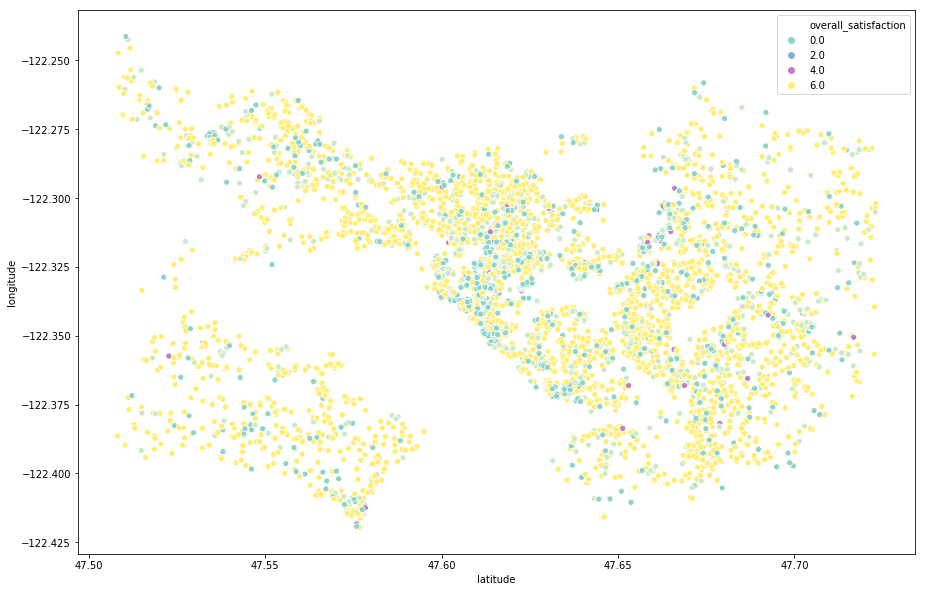

In [119]:
#visualizing the location + the color of the overall satisfaction
#can you change color another way?

plt.figure(figsize=(15, 10))
sns.scatterplot(xlat, ylong, hue=seattle["overall_satisfaction"], palette= "Set3" ,data=seattle_no_zero_satis)

In [132]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import contextily as ctx

In [133]:
geometry = [Point(xy) for xy in zip(seattle['longitude'], seattle['latitude'])]
gdf = GeoDataFrame(seattle, geometry=geometry)

(47.50807800000001, 47.72305)

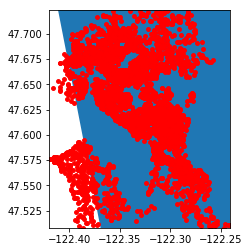

In [148]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = ax = world[world.continent == 'North America'].plot()
gdf.plot(ax= ax, marker='o', color='red', markersize=15)

minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)